# **E9:246 ADVANCED IMAGE PROCESSING - ASSIGNMENT 1**

**Name:**     <emsp>          *Sourav Mishra* <br>
**Course:**    <emsp>          *MTech* <br>
**Department:** <emsp>         *CDS* <br>
**S.R. No.:**   <emsp>         *06-02-01-10-51-18-1-15700* <br>
**Date of Submission:** <emsp> *02/02/2019 *

**python library versions:**<br>
*python v3.6.5<br>
numpy v1.16.0<br>
opencv v3.4.2<br>
matplotlib v3.0.2<br>
sklearn v0.20.2<br>
keras v2.2.4<br>
pydot v1.4.1<br>
tensorflow v1.12.0<br>
scipy v1.2.0<br>*

The results obtained in the course of experiments were stored into several datasets. These datasets are uploaded to the following link: [ADVANCED IMAGE PROCESSING ASSIGNMENT 1](https://github.com/srvmishra/ADVANCED-IMAGE-PROCESSING-ASSIGNMENT-1)<br>
The code which generates the dataset files used are given and discussed below. These files are loaded and the results are visualized. Please download the dataset files into a single directory and run the appropriate sections (*not marked with Do not run this section as datasets are available*) to verify the results. The github link above does not contain the raw images provided with the assignment. Please be sure to have those with you in case you wish to generate the dataset files instead of downloading them.<br>
In case you wish to evaluate the codes which generate the datasets, then do not download them and just run the codes as they are in the sequence in which they appear. Please be patient as generating some datasets can take as long as 40 minutes.<br>

## **Import All Necessary Libraries**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # change this and configure plots
plt.rc('lines', linewidth=2)
#plt.rcParams["figure.figsize"] = (20,80)
import os
import pickle
from save_and_load_dataset import save_data, load_data
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
import pydot

Using TensorFlow backend.


## **Datasets Generated and their Usage**

Running the code for the assignment parts takes a long time, particulary for the first question based on SIFT features. Clustering and constructing the feature vectors from bag of words is the most time consuming step. So at several intermediate steps the results of the computations were saved into files using the pickle library of python. This section is a brief documentation of these files. In this notebook which will be submitted for evaluation, these datasets will be loaded and results will be visualized. The code which generated the dataset is also provided in the subsequent cells with proper explanation of the process. 

The provided data consists of 4 categories of images - airplanes, bikes, cars and faces. Each category has two directories - one for training images and the other for test images. The training set for each category has 45 images and the test set for each category has 5 images.

**Datasets.pkl** - This file contains the matrices read from the images provided in the training and test sets. Generating this file was the very first step of the assignment in order to avoid accessing the directories multiple times. There are 4 variables in this file:
1. **train_imgs** - A list of numpy arrays with each array representing an image from the training set.
2. **train_labels** - A list of the labels of the corresponding images in the train_imgs list.
3. **test_imgs** - A list of numpy arrays with each array representing an image from the test set.
4. **test_labels** - A list of the labels of the corresponding images in the test_imgs list.

**Default.pkl** - This file is generated after computing the feature vectors using the bag of visual words found from clustering the descriptors obtained from the training images. A default vocabulary size of 10 was used which means that descriptors were grouped into 10 clusters. It consists of the following 6 variables:
1. **train_feature_vectors** - A list of feature vectors each of dimension $1\times10$, one for each training image.
2. **train_labels** - as described above.
3. **test_feature_vectors** - A list of feature vectors each of dimension $1\times10$, one for each test image. 
4. **test_labels** - as described above.
5. **centroids** - A numpy array of size $10\times128$ with each row containing one centroid found from k-means clustering.
6. **mean_distortion** - A scalar value which measures how much the clusters are distorted with respect to their centroids. Formula is shown below.

**Default_Distortions.pkl** - The value of k in k means clustering is varied and distortions are computed on the Default.pkl dataset. This dataset consists of the following variables:
1. **k_vals** - A list of k values for k means clustering starting from 10 to 260 with a step size of 50.
2. **distortions** - A list of distortions computed for the corresponding k value in k_vals on the Default.pkl dataset.

**Optimal.pkl** - This dataset is generated after finding the value of k which minimizes distortions across clusters. It essentially consists of all the same variables as the Default.pkl dataset above but these are computed using a vocabulary of optimal size rather than using a default size of $10$.

**Layerwise_Distortions.pkl** - The number of layers per octave in SIFT is varied and the generated descriptors are clustered into the optimal number of clusters and then distortions are computed on these clusters. This dataset consists of the following variables:
1. **n_layers** - A list of the number of layers per octave to use in SIFT - [3, 4, 5]
2. **distortions** - A list of distortions computed for the corresponding number of layers in n_layers.

**Sigwise_Distortions.pkl** - The standard deviation of the Gaussian smoothing filter in SIFT is varied and the generated descriptors are clustered into the optimal number of clusters and then distortions are computed on these clusters. This dataset consists of the following variables:
1. **sigma_vals** - A list of the standard deviation values of the Gaussian smoothing filter to use in SIFT - [3, 4, 5]
2. **distortions** - A list of distortions computed for the corresponding standard deviation value in sigma_vals.

**Selection_of_k_for_knn.pkl** - As the name suggests, this dataset is used for tuning the k value in k nearest neighbors classifier. It is done by varying the k value and computing several metrics which are stored into this file. It consists of the following variables:
1. **dataset** - It is a dictionary which contains as many keys as the number of k values tried for knn classification. Corresponding to each key value, it has a 4 element list:<br>
a. **predicted_test_labels** - A numpy array of size $1\times20$ with one label for each test image.<br>
b. **confusion_mat** - A numpy array of size $4\times4$ which is the confusion matrix for the corresponding k value. <br>
c. **classwise_prec** - A dictionary with 4 key value pairs with each key denoting a label and the corresponding value denoting the precision for that class.<br>
d. **avg_prec** - Average over all precision values computed with proper class proportions as weights, one for each k value.
2. **Precisions** - A list of avg_prec values.
3. **K_neighbors** - A list of k values to use in knn - starting at 2 and going till 40 in steps of 2.

**VGG16_features.pkl** - It is generated after passing the training and test data through the VGG16 network and collecting the features from the last fully connected layer. It contains the folowing variables:
1. **train_feature_vectors** - A numpy array of size $180\times4096$ with each row corresponding to a feature representation of an image from the training set.
2. **train_labels** - as described above.
3. **test_feature_vectors** - A numpy array of size $20\times4096$ with each row corresponding to a feature representation of an image from the test set.
4. **test_labels** - as described above.

**'Selection_of_k_for_knn_VGG16.pkl'** - It is exactly same as the 'Selection_of_k_for_knn.pkl' file except that the features computed from VGG16 are used in knn classification.

## **Utility Functions**

The functions in the code cells below have been used to solve the assignment and generate the above described datasets. A brief description of each of the following functions is provided alongwith it.

### **File I/O functions**

This function takes the list of parent directories and the path to it as input, reads the images therein and returns the list of image matrices in those folders along with the corresponding list of labels.

In [2]:
""" reading files into training and testing data and generating the labels accordingly """
def group_data(parent_dirs, path):
    file_list = []
    label_list = []
    for folder in parent_dirs:
        label = folder.split("_")[0]
        files = os.listdir(path+folder)
        for file in files:
            img = cv2.imread(path+folder+'/'+file)
            file_list.append(img)
            label_list.append(label)
    return file_list, label_list  

This function takes a dataset and a filename as input and saves the dataset to the file. It returns nothing. The file should not be existing already unless you want to put more data into it.

In [3]:
""" function to save data to a file """
def save_data(dataset, filename):
    with open(filename, 'wb') as f:
        pickle.dump(dataset, f)
    f.close()
    return 

This function takes the name of a file (listed above) as input, reads it and returns the data it contains.

In [4]:
""" function to load data from the given file name"""
def load_data(filename):
    if filename == 'Datasets.pkl':
        with open(filename, 'rb') as f:
            train_imgs, train_labels, test_imgs, test_labels = pickle.load(f)
        f.close()
        return train_imgs, train_labels, test_imgs, test_labels
    elif filename == 'Default.pkl':
        with open(filename, 'rb') as f:
            train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion = pickle.load(f)
        f.close()
        return train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion
    elif filename == 'Optimal.pkl':
        with open(filename, 'rb') as f:
            train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion = pickle.load(f)
        f.close()
        return train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion
    elif filename == 'Default_Distortions.pkl':
        with open(filename, 'rb') as f:
            distortions = pickle.load(f)
        f.close()
        return [10,60,110,160,210,260], distortions
    elif filename == 'Layerwise_Distortions.pkl':
        with open(filename, 'rb') as f:
            distortions = pickle.load(f)
        f.close()
        return [3,4,5], distortions
    elif filename == 'Sigwise_Distortions.pkl':
        with open(filename, 'rb') as f:
            distortions = pickle.load(f)
        f.close()
        return [2,4,8], distortions
    elif filename == 'Selection_of_k_for_knn.pkl':
        with open(filename, 'rb') as f:
            dataset, precisions, k_neighbors = pickle.load(f)
        f.close()
        return dataset, precisions, k_neighbors
    elif filename == 'VGG16_features.pkl':
        with open(filename, 'rb') as f:
            train_feature_vectors, train_labels, test_feature_vectors, test_labels = pickle.load(f)
        f.close()
        return train_feature_vectors, train_labels, test_feature_vectors, test_labels
    elif filename == 'Selection_of_k_for_knn_VGG16.pkl':
        with open(filename, 'rb') as f:
            dataset, precisions, k_neighbors = pickle.load(f)
        f.close()
        return dataset, precisions, k_neighbors
    else:
        print("Wrong file name")
        return 

### **SIFT functions **

This function takes an image array, the number of layers per octave and the standard deviation of the Gaussian smoothing filter used in SIFT as inputs and returns the SIFT descriptors computed from that image. 

In [5]:
""" function to extract the sift descriptors from images """
def extract_sift_features(img, n_octave_layers=None, sigma=None):
    if n_octave_layers is not None and sigma is None:
        sift = cv2.xfeatures2d.SIFT_create(nOctaveLayers=n_octave_layers)
    elif n_octave_layers is not None and sigma is not None:
        sift = cv2.xfeatures2d.SIFT_create(nOctaveLayers=n_octave_layers, sigma=sigma)
    elif n_octave_layers is None and sigma is not None:
        sift = cv2.xfeatures2d.SIFT_create(sigma=sigma)
    else:
        sift = cv2.xfeatures2d.SIFT_create()
    keypts, descriptors = sift.detectAndCompute(img, None)
    return descriptors

This function takes two image arrays as inputs and computes the SIFT keypoint matchings between them, draws them onto another image and returns the resulting image as output.

In [6]:
""" compute SIFT matching between two images based on FLANN based matcher """
def compute_descriptor_matching(img1, img2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, desc1 = sift.detectAndCompute(img1, None)
    kp2, desc2 = sift.detectAndCompute(img2, None)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(desc1,desc2,k=2)
    matchesMask = [[0,0] for i in range(len(matches))]
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = 0)
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    return img3

### **k means clustering functions**

This function takes the list of descriptor arrays (one descriptor array is obtained from one image), a trained k-means clustering method and the vocabulary size of bag of words model and computes a feature vector representation of the image with the ith index denoting the number of times the image contains the ith word in the visual vocabulary. It is important that the visual vocabulary is first built using k means clustering. Also the k means clustering method which is passed to this function must be trained on exactly the same number of clusters as the size argument to the function.

In [7]:
""" function to compute the feature vectors from the given clustering method """
def compute_feature_vecs(data, classifier, size):
    feature_vecs = []
    for img in data:
        centroid_assignments = classifier.predict(img)
        img_vec = np.array([np.sum(centroid_assignments==i) for i in range(size)])
        feature_vecs.append(img_vec)
    assert len(feature_vecs) == len(data)
    return feature_vecs

This function takes the train and test descriptors list, a vocabulary size (number of cluster centroids) and a boolean argument to specify whether to compute the feature vectors based on the bag of visual words representation. It computes the cluster centroids using k means clustering, the mean distortion across the clusters and the feature vector representation of the training and testing images if specified by the final argument. It return the centroids list, the mean distortions and the training and testing feature vectors. The centroids constitute the visual bag of words model computed from the training data. 

In [8]:
""" function to return visual bag of words using k-means clustering on training descriptors """
def visual_bogs(train_data, test_data, vocabulary_size=10, compute_fvs=True):
    train_mat = np.vstack(train_data)
    kmeans = KMeans(n_clusters=vocabulary_size)
    kmeans.fit(train_mat)
    centroids = kmeans.cluster_centers_
    mean_distortion = sum(np.min(cdist(train_mat, centroids, 'euclidean'), axis=1))/train_mat.shape[0]
    if compute_fvs:
        train_feature_vectors = compute_feature_vecs(train_data, kmeans, vocabulary_size)
        test_feature_vectors = compute_feature_vecs(test_data, kmeans, vocabulary_size)
        return centroids, mean_distortion, train_feature_vectors, test_feature_vectors
    else:
        return centroids, mean_distortion

### ** k nearest neighbors functions**

These functions map the list of labels into codes - 1,2,3 and 4 and vice versa. This is done to provide a numeric label to the K nearest neighbors classification algorithm.

In [9]:
""" mapping and inverse mapping of labels """
def map_labels(labels):
    mapped_labels = []
    for label in labels:
        if label == 'bikes':
            code = 1
        if label == 'airplanes':
            code = 2
        if label == 'cars':
            code = 3
        if label == 'faces':
            code = 4
        mapped_labels.append(code)
    return np.array(mapped_labels)

def inv_map_labels(vectors):
    labels = []
    for vector in vectors:
        if vector==1:
            label = 'bikes'
        if vector==2:
            label = 'airplanes'
        if vector==3:
            label = 'cars'
        if vector==4:
            label = 'faces'
        labels.append(label)
    return labels

This function takes the train and test feature vectors and labels and a value for the number of nearest neighbors to use. It computes the labels of the test images, the confusion matrix, classwise precisions and the average precision and returns them.

In [10]:
""" compute k nearest neighbors classifier on the training and testing feature vectors """
def predict_label(train_data, train_labels, test_data, test_labels, k_val=5):
    train_vecs = map_labels(train_labels)
    neigh = KNeighborsClassifier(n_neighbors=k_val)
    neigh.fit(np.array(train_data), train_vecs)
    #predicted_test_labels = np.array([neigh.predict(img) for img in test_data])
    predicted_test_labels = neigh.predict(np.array(test_data))
    predicted_test_labels = inv_map_labels(predicted_test_labels)
    confusion_mat, classwise_prec, avg_prec = compute_precision(test_labels, predicted_test_labels)
    return predicted_test_labels, confusion_mat, classwise_prec, avg_prec

This function takes the test labels and predicted labels and computes the confusion matrix, classwise precision dictionary and the average precision across classes.

In [11]:
""" compute the classwise precision and the confusion matrix """
def compute_precision(test_labels, predicted_test_labels):
    test_labels = np.array(test_labels)
    predicted_test_labels = np.array(predicted_test_labels)
    labels = np.unique(test_labels)
    confusion_mat = np.array([[np.sum((test_labels==i)*(predicted_test_labels==j)) for j in labels] for i in labels])
    precision = {}
    avg_precision = 0
    total_labels = len(test_labels)
    for i in range(len(labels)):
        if confusion_mat[i, i] == 0:
            precision[labels[i]] = 0
        else:
            precision[labels[i]] = confusion_mat[i, i]/np.sum(confusion_mat[:, i])
        avg_precision = avg_precision + sum(test_labels==labels[i])*precision[labels[i]]/total_labels
    return confusion_mat, precision, avg_precision

### ** Reshape images for VGG16**

VGG16 takes a numpy array of images with each image being a $224\times224\times3$ array. This function takes a list of image arrays and reshapes them into the required shape and returns an array of reshaped images.

In [12]:
def image_reshape(img_list, req_shape):
    n_imgs = len(img_list)
    img_arr = np.array([cv2.resize(x, req_shape) for x in img_list])
    assert img_arr.shape[0] == n_imgs and img_arr.shape[1] == req_shape[0] and img_arr.shape[2] == req_shape[1] and img_arr.shape[3] == 3 
    return img_arr

### **Retrieve images **

This function takes the array of feature vector representations for the training images, a query feature vector and the number of matches to return (k) as inputs and returns the indices of the top k matches found in the training set based on Euclidean distance metric.

In [13]:
""" retrieve top 4 matching images """
def retrieve_top_k(training_data, query_fv, k):
    training_data = np.array(training_data)
    query_fv = np.array(query_fv).reshape((1, -1))
    indices = np.argsort(cdist(query_fv, training_data, 'euclidean'))
    return indices[0,:k]

This function is a convenience functionality for plotting the top 4 retrieved images from the training set.

In [14]:
""" plot retrieved images """
def plot_retrieved_images(training_imgs, retrieved_inds, suptitle):
    fig = plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((2,2), (0, 0))
    ax2 = plt.subplot2grid((2,2), (0, 1))
    ax3 = plt.subplot2grid((2,2), (1, 0))
    ax4 = plt.subplot2grid((2,2), (1, 1))
    #ax5 = plt.subplot2grid((2,4), (0, 0), colspan=2, rowspan=2)
    #plt.subplot(243)
    ax1.imshow(train_imgs[retrieved_inds[0]], cmap='gray')
    ax1.set_title('1st match')
    ax1.axis('off')
    #plt.subplot(244)
    ax2.imshow(train_imgs[retrieved_inds[1]], cmap='gray')
    ax2.set_title('2nd match')
    ax2.axis('off')
    #plt.subplot(247)
    ax3.imshow(train_imgs[retrieved_inds[2]], cmap='gray')
    ax3.set_title('3rd match')
    ax3.axis('off')
    #plt.subplot(248)
    ax4.imshow(train_imgs[retrieved_inds[3]], cmap='gray')
    ax4.set_title('4th match')
    ax4.axis('off')
    #plt.subplot(121)
    #ax5.imshow(query_img, cmap='gray')
    #ax5.set_title('Query')
    #ax5.axis('off')
    plt.suptitle(suptitle)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.02)
    plt.show()
    return

## **SIFT and VGG16 Based Image Classification**

Since the results have been computed already, instead of computing them again in a step by step fashion first for SIFT and then for VGG16 is not required. So a comparison of results is produced in this section. However the detailed pipeline of SIFT and VGG16 based classifiers are shown along with the code and explanation for each step. For evaluation, the codes could be run again. However, the results stored in the files generated above are loaded and discussed.

**Pipeline for SIFT based classifier**

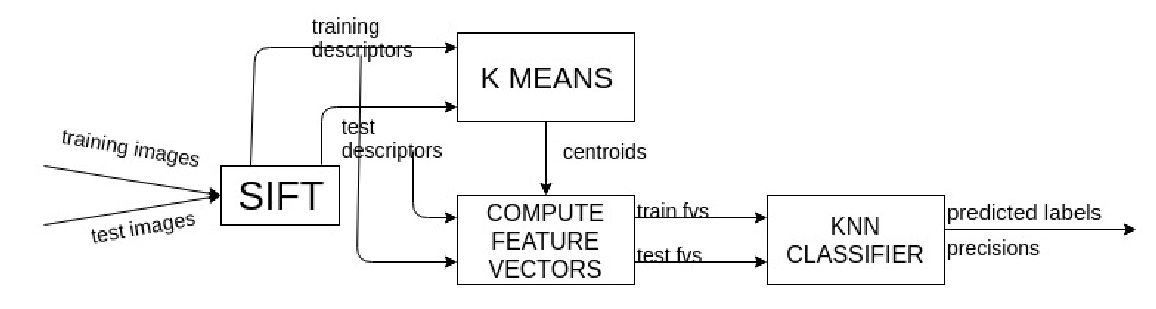

In [15]:
sift_pipeline = cv2.imread('SIFT pipeline.jpg', 0)
plt.figure(figsize=(20,80))
plt.imshow(sift_pipeline, cmap='gray')
plt.axis('off')
plt.show()

**Pipieline for VGG16 based classifier**

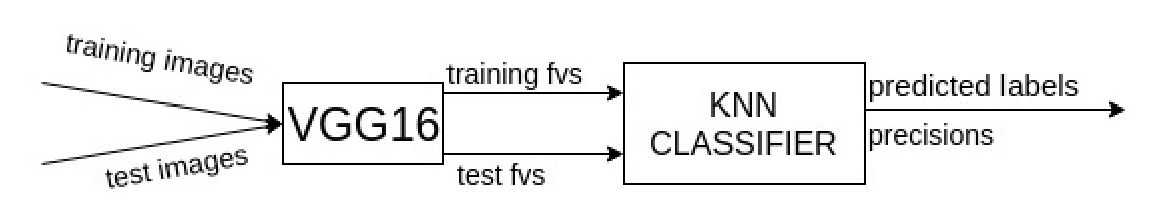

In [16]:
vgg_pipeline = cv2.imread('VGG16 pipeline.jpg', 0)
plt.figure(figsize=(20,80))
plt.imshow(vgg_pipeline, cmap='gray')
plt.axis('off')
plt.show()

**1. Saving everything into Datasets.pkl file: (Do not run this section as dataset is available)**

In case you want to evaluate the code, then put the provided dataset in a new directory and change the dirpath variable to point to that directory. Do not change the organization of directories in the provided dataset, simply copy and paste it to your test directory before running the code.

In [ ]:
"""change the dirpath variable to appropriate directory before running this section"""
dirpath = "/home/dohvakiin/Desktop/AIP ASSIGNMENTS/new data/assignment1_data/"
subdirs = [f.name for f in os.scandir(dirpath) if f.is_dir()]
train_dirs = [x for x in subdirs if 'train' in x]
test_dirs = [x for x in subdirs if 'test' in x]
train_imgs, train_labels = group_data(train_dirs, dirpath)
test_imgs, test_labels = group_data(test_dirs, dirpath)
train_labels = [train_labels[i] for i in range(len(train_labels)) if train_imgs[i] is not None]
train_imgs = [train_imgs[i] for i in range(len(train_imgs)) if train_imgs[i] is not None]
test_labels = [test_labels[i] for i in range(len(test_labels)) if test_imgs[i] is not None]
test_imgs = [test_imgs[i] for i in range(len(test_imgs)) if test_imgs[i] is not None]

""" write the data into a master file """
dataset = [train_imgs, train_labels, test_imgs, test_labels]
filename = 'Datasets.pkl'
save_data(dataset, filename)

**2. Generating the Default.pkl file for comparison: (Do not run this section as dataset is available)**

For evaluation purposes, you could run the code by commenting the last two lines and using the computed centroids, mean distortions and feature vectors. The default number of clusters or the vocabulary size is 10.

In [ ]:
""" load data and obtain the descriptors of train and test images """
train_imgs, train_labels, test_imgs, test_labels = load_data('Datasets.pkl')
train_descriptors = [extract_sift_features(img) for img in train_imgs]
test_descriptors = [extract_sift_features(img) for img in test_imgs]

""" save the descriptors and bag of words into a file """
centroids, mean_distortion, train_feature_vectors, test_feature_vectors = visual_bogs(train_descriptors, test_descriptors)
dataset = [train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion]
filename = 'Default.pkl'
save_data(dataset, filename)

### ** Finding the optimal number of clusters or the Vocabulary size for SIFT descriptors**

**3. Generating the Default_Distortions.pkl file: (Do not run this section as dataset is available)**

The value of k is varied and the mean distortions across k clusters are computed and stored in the Default_Distortions.pkl file.

In [ ]:
""" compute the mean distortions for a range of vocabulary sizes - tuning the optimal vocabulary size"""
k_vals = range(10, 310, 50)
distortions = []
for k in k_vals:
    centroids, mean_distortions = visual_bogs(train_descriptors, test_descriptors, vocabulary_size=k, compute_fvs=False)
    distortions.append(mean_distortions)
filename = 'Default_Distortions.pkl'
save_data(distortions, filename)

The Default_Distortions.pkl file is loaded and the elbow plot is visualized. The elbow plot is a plot which is used for finding an optimal number of clusters in k-means clustering. <br>
Distortions are plotted along the y-axis and the number of clusters is plotted along the x-axis. The elbow is the point of sharpest decrease in the value of distortions. <br>
Mean distortions across clusters are calculated using the following formula: <br>
<center>$$J = \dfrac{1}{k}\sum_{C_{i} = 1}^{k}\sum_{i = 1}^{n_{C_{i}}} ||x_{i} - \mu_{C_{i}}||^{2}$$</center><br>
where the point $x_{i}$ belongs to the cluster with center $\mu_{C_{i}}$<br>
It is a measure of how close the points are to their cluster centroids on average and how separated the clusters are.<br>
**The idea behind using this metric to find out an optimal value for the number of clusters is that well separated and tight clusters will lead to better classification.**<br>
Finding the optimal value for the number of clusters is a trade off between execution time and classification accuracy. A reason for using a larger number of clusters can be that separations between clusters and hence feature vectors will increase with number of dimensions (that is number of clusters or vocabulary size). At the same time, the improvement to the mean distortion is not much and execution time becomes too much. So we choose the value of k at the elbow.

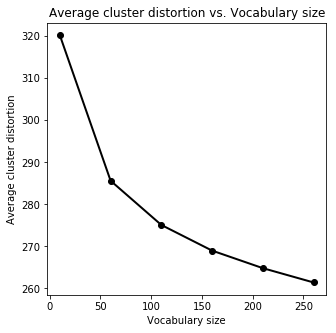

In [17]:
""" elbow plot for optimal number of clusters or vocabulary size """
k_vals, distortions = load_data('Default_Distortions.pkl')
fig=plt.figure(figsize=(5, 5))
#plt.figure()
plt.plot(k_vals, distortions, 'ko-', lw=2)
plt.xlabel('Vocabulary size')
plt.ylabel('Average cluster distortion')
plt.title('Average cluster distortion vs. Vocabulary size')
plt.show()

The optimal number of clusters is found to be around 50. So a value of 50 clusters (also the vocabulary size) is used for further experiments.

**4. Generating the Optimal.pkl dataset: (Do not run this section as dataset is available)**

The visual bag of words and the feature vector representation of the training and test images are found with the optimal value of k found above and stored into the Optimal.pkl file. The visual_bogs function is used for computation of feature vectors and cluster centroids (visual words).

In [ ]:
""" save the optimal dataset for future use """
centroids, mean_distortion, train_feature_vectors, test_feature_vectors = visual_bogs(train_descriptors, test_descriptors, vocabulary_size=50)
dataset = [train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion]
filename = 'Optimal.pkl'
save_data(dataset, filename)

### **Experiments with SIFT parameters**

In this section, the number of layers per octave in SIFT and the standard deviation of the Gaussian smoothing filter used in SIFT are varied and the effect on separation between resulting clusters is studied using the mean cluster distortion metric.

**5. Generating the Layerwise_Distortions.pkl file: (Do not run this section as dataset is available)**

The number of layers per octave is varied and visual bag of words is computed on the resulting descriptors using an optimal number of clusters found above. Mean distortions are computed across clusters for different values of number of layers per octave and stored in the Layerwise_Distortions.pkl file.

In [ ]:
""" tuning number of layers at default variance"""
n_layers = [3, 4, 5]
k_opt = 50
distortions = []
for k in n_layers:
    print("Running for k = %d"%(k))
    train_descriptors = [extract_sift_features(img, n_octave_layers=k) for img in train_imgs]
    test_descriptors = [extract_sift_features(img, n_octave_layers=k) for img in test_imgs]
    centroids, mean_distortions = visual_bogs(train_descriptors, test_descriptors, vocabulary_size=k_opt, compute_fvs=False)
    distortions.append(mean_distortions)
    print("k=%d, distortion=%0.2f"%(k,mean_distortions))
filename = 'Layerwise_Distortions.pkl'
save_data(distortions, filename)

**6. Generating the Sigwise_Distortions.pkl file: (Do not run this section as dataset is available)**

The standard deviation of the Gaussian smoothing filter is varied and visual bag of words is computed on the resulting descriptors using an optimal number of clusters found above. Mean distortions are computed across clusters for different values of standard deviation and stored in the Sigwise_Distortions.pkl file.

In [ ]:
""" tuning the variance of gaussian masks at default number of layers"""
sigma_vals = [2, 4, 8]
k_opt = 50
distortions = []
for val in sigma_vals:
    print("Running for sigma = %d"%(val))
    train_descriptors = [extract_sift_features(img, sigma=val) for img in train_imgs]
    test_descriptors = [extract_sift_features(img, sigma=val) for img in test_imgs]
    centroids, mean_distortions = visual_bogs(train_descriptors, test_descriptors, vocabulary_size=k_opt, compute_fvs=False)
    distortions.append(mean_distortions)
    print("sigma=%d, distortion=%0.2f"%(val,mean_distortions))
filename = 'Sigwise_Distortions.pkl'
save_data(distortions, filename)

In order to figure out the optimal values of the SIFT parameters, distortion plots are constructed below. It is found that the best results are obtained by letting these parameters have their default values.

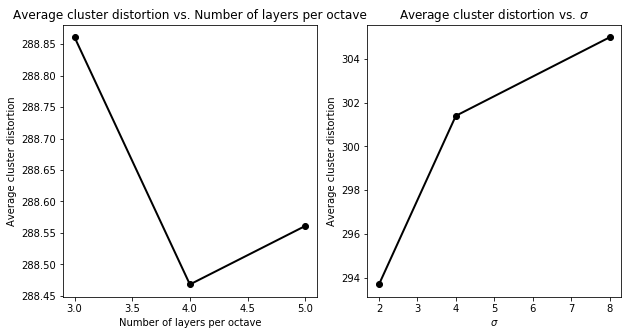

In [18]:
""" elbow plot for number of layers per octave and variance of gaussian filter in SIFT """
k_vals, layer_distortions = load_data('Layerwise_Distortions.pkl')
sig_vals, sig_distortions = load_data('Sigwise_Distortions.pkl')

fig=plt.figure(figsize=(10, 5), facecolor='w')
plt.subplot(121)
plt.plot(k_vals, layer_distortions, 'ko-', lw=2)
plt.xlabel('Number of layers per octave')
plt.ylabel('Average cluster distortion')
plt.title('Average cluster distortion vs. Number of layers per octave')

plt.subplot(122)
plt.plot(sig_vals, sig_distortions, 'ko-', lw=2)
plt.xlabel('$\sigma$')
plt.ylabel('Average cluster distortion')
plt.title('Average cluster distortion vs. $\sigma$')
plt.show()

It is seen that the number of layers per octave does not have a significant effect on the average distortions across clusters whereas the standard deviation of the Gaussian smoothing filter does. Within an octave, there is not much difference between layers as the standard deviation of Gaussian smoothing is $2^{1/n}$ between layers where n is the number of layers in the octave. But across layers, the standard deviation of Gaussian smoothing doubles. So using a larger standard deviation for Gaussian smoothing will lead to more averaging or loss of more interesting features. Which is why the average distortions increase. With the keypoints and descriptors not being a reliable representation of the image, they go further from their respective cluster centroids and the average distortion across classes increases. This leads to feature vectors computed from visual bag of words using the computed centroids mixed into each other than being well separated which is not good for classification.<br>
It is thus best to use SIFT with its default settings: 5 layers per octave and number of octaves ar decided by the size of the input image and standard deviation of Gaussian smoothing filter equal to 1.6.

### **Finding the Optimal number of nearest neighbors for classification**

**7. Generating the Selection_of_k_for_knn.pkl file: (Do not run this section as dataset is available)**

The Optimal.pkl file is loaded and the feature vectors contained therein are classified using KNN for different values of k. An optimal value of k is selected which maximizes the average precision of classification on the test set. The results are stored into the 'Selection_of_k_for_knn.pkl' file. This is loaded and the plots are visualized.

In [ ]:
""" load the optimal data and tune the knn on it"""
train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion = load_data('Optimal.pkl')
k_neighbors = list(range(2, 42, 2))
dataset = {}
precisions = []
filename = 'Selection_of_k_for_knn.pkl'
for k in k_neighbors:
    predicted_test_labels, confusion_mat, classwise_prec, avg_prec = predict_label(train_feature_vectors, train_labels, test_feature_vectors, test_labels, k_val=k)
    dataset[k] = [predicted_test_labels, confusion_mat, classwise_prec, avg_prec]
    precisions.append(avg_prec)
save_data([dataset, precisions, k_neighbors], filename)

Here we load the results and visualize them.

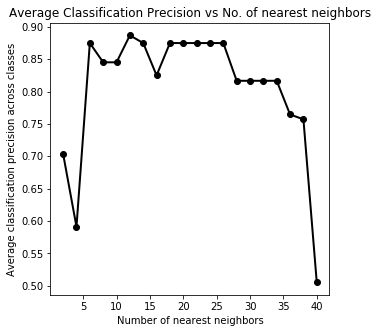

In [19]:
""" compare knn with optimal k on default and optimal datasets"""
k_opt = 50

train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion = load_data('Default.pkl')
_, default_confusion_mat, default_classwise_prec, default_avg_prec = predict_label(train_feature_vectors, train_labels, test_feature_vectors, test_labels, k_val=k_opt)
dataset, precisions, k_neighbors = load_data('Selection_of_k_for_knn.pkl')

""" average precision vs. no. of nearest neighbors for SIFT"""
fig=plt.figure(figsize=(5, 5))
plt.plot(k_neighbors, precisions, 'ko-', lw=2)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Average classification precision across classes')
plt.title('Average Classification Precision vs No. of nearest neighbors')
plt.show()

The optimal value of k is found to be at 12. As the number of neighbors grows, images of other labels enter into the k nearest neighbors and hence the classification precision decreases.<br>
From the point of view of each class, the training and test data sets are clearly balanced. But from a one vs rest classification point of view, the dataset is slightly skewed, so instead of accuracy, precision is used as the classification metric.<br>
Precision values are computed for each class and then a weighted sum is taken where the weights denote the proportion of the corresponding class label in the training set. This is how average precision is obtained across all classes. These values are plotted above.

In [20]:
"""print the average precisions across classes for the optimal and default vocabulary sizes"""
k_opt = 12
optimum_avg_prec = dataset[k_opt][3]
print("Optimal number of nearest neighbors = %d"%(k_opt))
print("Optimal Vocabulary size = 50, average precision = %.2f"%(optimum_avg_prec))
print("Default Vocabulary size = 10, average precision = %.2f"%(default_avg_prec))

Optimal number of nearest neighbors = 12
Optimal Vocabulary size = 50, average precision = 0.89
Default Vocabulary size = 10, average precision = 0.80


From the average precision alone it is not clear whether there is much performance gain resulting with an optimal vocabulary size although there is some. So, we plot the confusion matrices below to have a look at the classwise prediction performances.

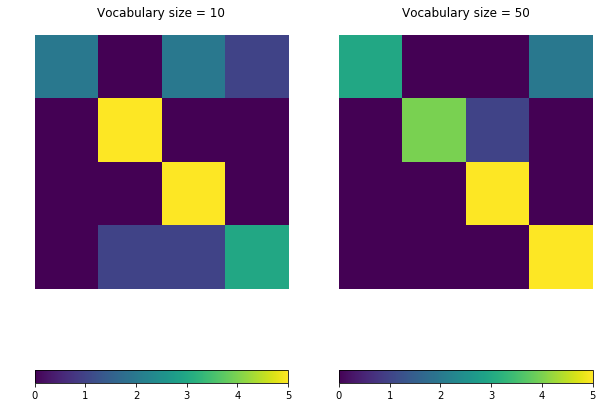

In [21]:
""" confusion matrices for default and optimal datasets with optimal knn"""
k_opt = 12

optimum_confusion_mat = dataset[k_opt][1]
optimum_classwise_prec = dataset[k_opt][2]
optimum_avg_prec = dataset[k_opt][3]

fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121)
cax1 = ax.matshow(default_confusion_mat)
fig.colorbar(cax1, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.axis('off')
plt.title('Vocabulary size = 10')
ax = fig.add_subplot(122)
cax2 = ax.matshow(optimum_confusion_mat)
fig.colorbar(cax2, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Vocabulary size = 50')
plt.axis('off')
plt.show()

The above is a plot of the confusion matrices. The plot on the left is obtained using a vocabulary size of 10 and optimum number of nearest neighbors. The plot on the right is obtained using an optimum vocabulary size of 50 and optimum number of nearest neighbors.<br>
Clearly the plot on the right indicates a better classwise prediction performance as seen using the colorbars below.

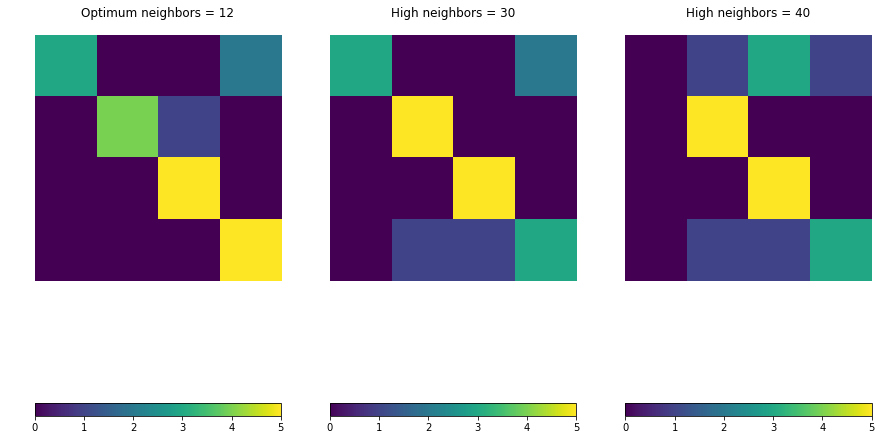

In [22]:
""" confusion matrices for optimal datasets with optimal knn and high knn"""
k_opt = 12
k_high = 30
k_highest = 40

optimum_confusion_mat = dataset[k_opt][1]
high_confusion_mat = dataset[k_high][1]
highest_confusion_mat = dataset[k_highest][1]

fig=plt.figure(figsize=(15, 15))
ax = fig.add_subplot(131)
cax1 = ax.matshow(optimum_confusion_mat)
fig.colorbar(cax1, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.axis('off')
plt.title('Optimum neighbors = 12')

ax = fig.add_subplot(132)
cax2 = ax.matshow(high_confusion_mat)
fig.colorbar(cax2, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('High neighbors = 30')
plt.axis('off')

ax = fig.add_subplot(133)
cax2 = ax.matshow(highest_confusion_mat)
fig.colorbar(cax2, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('High neighbors = 40')
plt.axis('off')
plt.show()

The plots above are the confusion matrices of knn classifiers for different k values. Starting from the left we have k = 12 (optimal), 30 and 40 nearest neighbors. On inspecting these plots using the attached colorbars, it is clear that classification performance degrades as k value increases.

### **SIFT based matching **

SIFT features matchings are done between a few pairs of images and the results are shown. Sometimes there may be more matchings between images from different classes than between images from the same class. But these matchings mostly come from the background features and not the main contents of the image. This can sometimes lead to wrong classification or retrieval if a very less or very large number of nearest neighbors are used for classification. Cases when more descriptors are obtained from background than foreground will mostly lead to wrong matching as SIFT does not discriminate between background and foreground features.<br>
This indicates that the image feature vectors computed using the visual bag of words model from clustering on SIFT descriptors may not be that well separated in space. After all the space is of as many dimensions as the vocabulary size, which in this case is 50, which is not very high and secondly, the SIFT descriptors are obtained from both background and foreground objects and are treated equally while matching between images.<br>
So SIFT descriptors are not good for image classification in general.

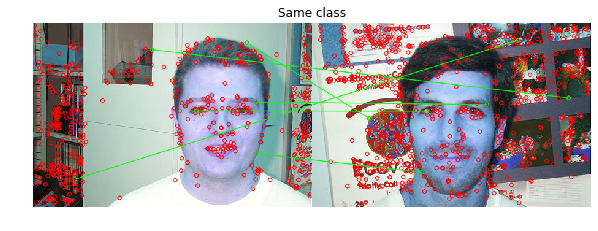

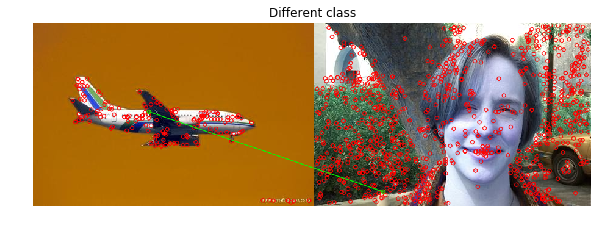

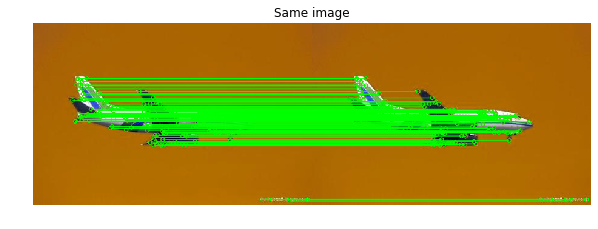

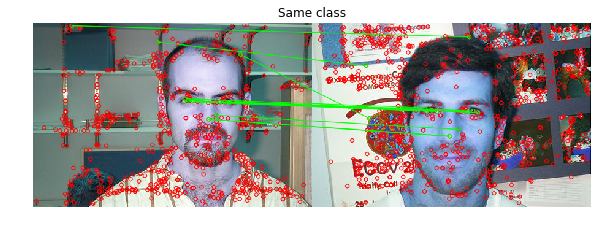

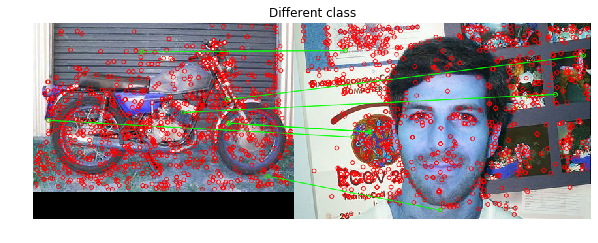

In [23]:
""" plotting SIFT matches"""
""" same image, same class and different class"""
train_imgs, train_labels, test_imgs, test_labels = load_data('Datasets.pkl')
img1 = compute_descriptor_matching(test_imgs[7], train_imgs[50])
img2 = compute_descriptor_matching(test_imgs[1], train_imgs[47])
img3 = compute_descriptor_matching(test_imgs[1], test_imgs[1])
img4 = compute_descriptor_matching(test_imgs[5], train_imgs[50])
img5 = compute_descriptor_matching(test_imgs[10], train_imgs[50])
fig=plt.figure(figsize=(10, 10))
#fig=plt.figure()
plt.imshow(img1)
plt.axis('off')
plt.title('Same class')
fig=plt.figure(figsize=(10, 10))
plt.imshow(img2)
plt.axis('off')
plt.title('Different class')
fig=plt.figure(figsize=(10, 10))
plt.imshow(img3)
plt.axis('off')
plt.title('Same image')
fig=plt.figure(figsize=(10, 10))
plt.imshow(img4)
plt.axis('off')
plt.title('Same class')
fig=plt.figure(figsize=(10, 10))
plt.imshow(img5)
plt.axis('off')
plt.title('Different class')
plt.show()

### **Experiments with VGG16**

We are supposed to extract features from the last fully connected layer of VGG16 and use them from classification. The pretrained VGG16 network is available in keras library applications module and has been imported in the beginning. <br>
First, the model needs to be constructed and parameters need to be loaded. The next two lines of code do this.

In [24]:
net = VGG16()
extractor = Model(inputs=net.inputs, outputs=net.get_layer('fc2').output)

Next, we view a summary of the model and its graph.

In [25]:
extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

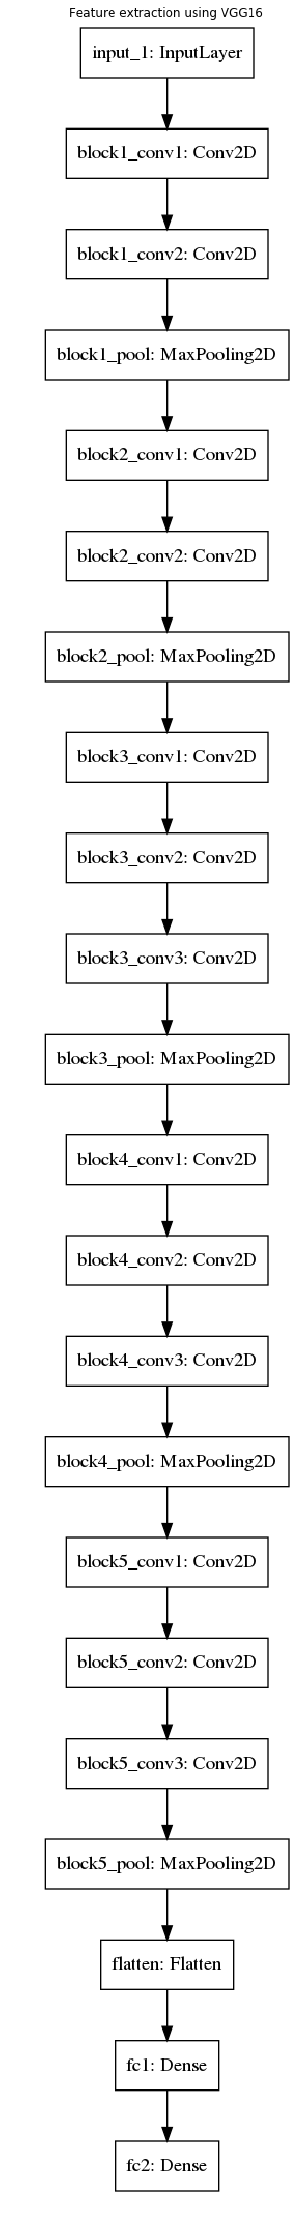

In [26]:
plot_model(extractor, to_file='feature_extractor.png')
model_img = cv2.imread('feature_extractor.png')
plt.figure(figsize=(40,40))
plt.imshow(model_img, cmap='gray')
plt.axis('off')
plt.title('Feature extraction using VGG16')
plt.show()

**8. Generating the 'VGG16_features.pkl' file: (Do not run this section as dataset is available)**

This section uses the above model and computes the features of the training and test images. First they are reshaped into $224\times224\times224$ so that the network can process these images. Next, the computed features and labels are stored in the 'VGG16_features.pkl' file. These features are then fed to a KNN classifier for classification. Each feature is $4096$ elements long.

In [ ]:
train_imgs, train_labels, test_imgs, test_labels = load_data('Datasets.pkl')
reshaped_train_imgs = image_reshape(train_imgs, (224,224))
reshaped_test_imgs = image_reshape(test_imgs, (224,224))
train_feature_vectors = extractor.predict(reshaped_train_imgs)
test_feature_vectors = extractor.predict(reshaped_test_imgs)

dataset = [train_feature_vectors, train_labels, test_feature_vectors, test_labels]
filename = 'VGG16_features.pkl'
save_data(dataset, filename)

### **Finding the Optimal number of nearest neighbors for classification**

A similar procedure is followed as in the case of SIFT features for finding the optimal number of neighbors for classification. 

**9. Generating the 'Selection_of_k_for_knn_VGG16.pkl' file: (Do not run this section as dataset is available)**

The file is generated in the same manner as 'Selection_of_k_for_knn.pkl' file.

In [ ]:
""" tune k for knn """
train_feature_vectors, train_labels, test_feature_vectors, test_labels = load_data('VGG16_features.pkl')
k_neighbors = list(range(2, 42, 2))
dataset = {}
precisions = []
filename = 'Selection_of_k_for_knn_VGG16.pkl'
for k in k_neighbors:
    predicted_test_labels, confusion_mat, classwise_prec, avg_prec = predict_label(train_feature_vectors, train_labels, test_feature_vectors, test_labels, k_val=k)
    dataset[k] = [predicted_test_labels, confusion_mat, classwise_prec, avg_prec]
    precisions.append(avg_prec)
save_data([dataset, precisions, k_neighbors], filename)

The above mentioned dataset file is loaded and results are visualized.

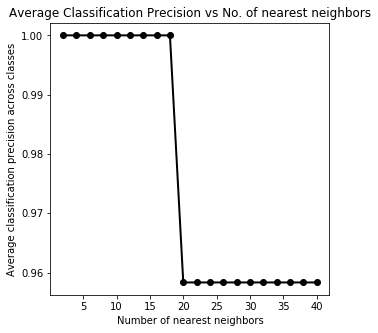

In [27]:
""" average precision vs. no. of nearest neighbors for VGG16"""
dataset, precisions, k_neighbors = load_data('Selection_of_k_for_knn_VGG16.pkl')
fig=plt.figure(figsize=(5, 5))
plt.plot(k_neighbors, precisions, 'ko-', lw=2)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Average classification precision across classes')
plt.title('Average Classification Precision vs No. of nearest neighbors')
plt.show()

It is observed that the number of optimum nearest neighbors is same for VGG16 and SIFT features in the sense that knn achieves maximum precision with the same k for both. However, for the case of VGG16 features, the value of k can be reduced much more, that is, if a minimum optimal nearest neighbor is used to compare both then VGG16 would outperform SIFT significantly. <br>
From the plot above, it is observed that VGG16 features achieve 100% precision even with 2 nearest neighbors whereas the minimum optimal number of nearest neighbors is 12 for SIFT based features.<br>
Turning to the discussion at the beginning of SIFT based matching section, we indeed find the points mentioned there verified. The factors contributing to classification precision with VGG16 features are:
<p> &nbsp; &nbsp; 1. VGG16 features are 4096 dimensional whereas SIFT based feature vectors computed from bag of words model are 50 dimensional.</p>
<p> &nbsp; &nbsp; 2. Foreground objects and background objects are weighted the same in SIFT and in case more descriptors are obtained from background objects in SIFT, chances of misclassification are high. On the other hand VGG16 network does not let this happen. The reason behind this could be the function of max pooling layers where the contribution of most dominant features are retained. This differentiates the foreground and background.</p><br>
The point of minimum optimal nearest neighbors and the quality of feature vectors obtained from SIFT vs. VGG16 will be stressed upon further in the image retrieval section below.

### **Comparison of SIFT and VGG16 based Classifiers**

**Confusion Matrices of Classifiers**

Confusion matrices are a way of visualizing the classwise prediction performance of classifiers. It shows the number of predicted labels and true labels. It can then be used to find the metrics like accuracy, true positive rate, false positive rate, precision, recall, etc. <br>
Here we visualize the confusion matrices of the two classifiers. For SIFT, we use the optimal vocabulary size of 50 and minimum number of optimal nearest neighbors as 12. For VGG16 based classifier, the minimum number of optimal nearest neighbors used is 2. For consistency, the case when minimum number of optimal nearest neighbors is 12 is also shown.

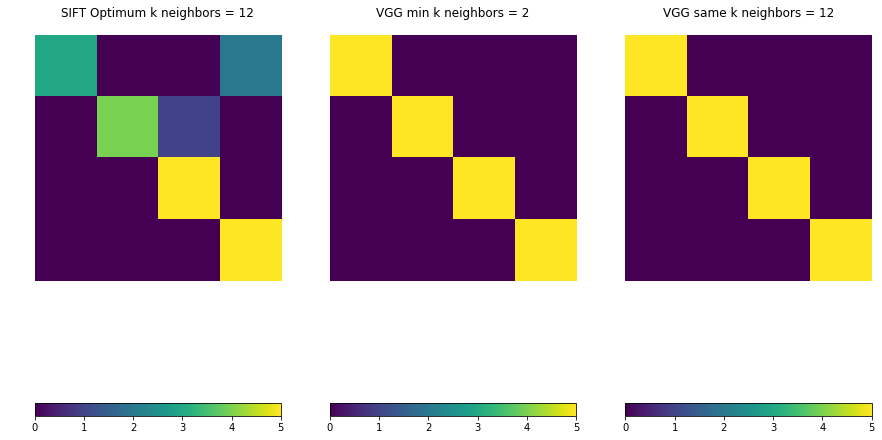

In [28]:
VGGdataset, VGGprecisions, VGGk_neighbors = load_data('Selection_of_k_for_knn_VGG16.pkl')
SIFTdataset, SIFTprecisions, SIFTk_neighbors = load_data('Selection_of_k_for_knn.pkl')

SIFTk_opt = 12
VGGk_opt = 2

SIFTconfusion_mat = SIFTdataset[SIFTk_opt][1]
VGGconfusion_mat_min = VGGdataset[VGGk_opt][1]
VGGconfusion_mat_same = VGGdataset[SIFTk_opt][1]

fig=plt.figure(figsize=(15, 15))
ax = fig.add_subplot(131)
cax1 = ax.matshow(SIFTconfusion_mat)
fig.colorbar(cax1, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.axis('off')
plt.title('SIFT Optimum k neighbors = 12')

ax = fig.add_subplot(132)
cax2 = ax.matshow(VGGconfusion_mat_min)
fig.colorbar(cax2, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('VGG min k neighbors = 2')
plt.axis('off')

ax = fig.add_subplot(133)
cax2 = ax.matshow(VGGconfusion_mat_same)
fig.colorbar(cax2, orientation='horizontal')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('VGG same k neighbors = 12')
plt.axis('off')
plt.show()

The confusion matrices corroborate the precision plot obtained above. VGG16 based classifier achieves 100$%$ classwise classification precision for every class for both k = 2 and k = 12. This shows that VGG16 features are far better for classification.

**Summary of Performance for both Classifiers**

Here we show the summary of average precision, classwise precision and minimum optimal nearest neighbors for both classifiers.

In [29]:
train_feature_vectors, train_labels, test_feature_vectors, test_labels, centroids, mean_distortion = load_data('Default.pkl')
_, SIFTdefault_confusion_mat, SIFTdefault_classwise_prec, SIFTdefault_avg_prec = predict_label(train_feature_vectors, train_labels, test_feature_vectors, test_labels, k_val=12)

print('SIFT based classifier, Vocabulary size = 10, nearest neighbors = 12')
for label in list(set(test_labels)):
    print("%s precision = %.2f"%(label, SIFTdefault_classwise_prec[label]))
#print('average precision across all classes = %.3f\n'%(SIFTdefault_avg_prec))
print('\n')

print('SIFT based classifier, Vocabulary size = 50, nearest neighbors = 12')
for label in list(set(test_labels)):
    print("%s precision = %.2f"%(label, SIFTdataset[12][2][label]))
#print('average precision across all classes = %.3f\n'%(SIFTprecisions[12]))
print('\n')

print('VGG16 based classifier, Vocabulary size = 50, nearest neighbors = 2')
for label in list(set(test_labels)):
    print("%s precision = %.2f"%(label, VGGdataset[2][2][label]))
#print('average precision across all classes = %.3f\n'%(VGGprecisions[2]))
print('\n')

print('VGG16 based classifier, Vocabulary size = 50, nearest neighbors = 12')
for label in list(set(test_labels)):
    print("%s precision = %.2f"%(label, VGGdataset[12][2][label]))
#print('average precision across all classes = %.3f\n'%(VGGprecisions[12]))
print('\n')

SIFT based classifier, Vocabulary size = 10, nearest neighbors = 12
faces precision = 0.71
airplanes precision = 1.00
bikes precision = 1.00
cars precision = 0.80


SIFT based classifier, Vocabulary size = 50, nearest neighbors = 12
faces precision = 0.71
airplanes precision = 1.00
bikes precision = 1.00
cars precision = 0.83


VGG16 based classifier, Vocabulary size = 50, nearest neighbors = 2
faces precision = 1.00
airplanes precision = 1.00
bikes precision = 1.00
cars precision = 1.00


VGG16 based classifier, Vocabulary size = 50, nearest neighbors = 12
faces precision = 1.00
airplanes precision = 1.00
bikes precision = 1.00
cars precision = 1.00




Clearly VGG16 outperforms SIFT.

**Image Retrieval Based on SIFT and VGG16 features**

In this section the closest 4 images are retrieved. The feature vector of the query image is compared with those of all training images and the closest 4 are selected by ordering the training images in increasing order of Euclidean distance.<br>
The point to note here is that the classwise precisions of SIFT and VGG16 based classifiers depict that airplanes and bikes were never misclassified. So if there are images of other classes in top 4 matches for SIFT based classifier for airplane and bike query images, then in the entire top 12 matches, there are more images of the correct class. However the average precision for 4 nearest neighbors based SIFT classifier is less than 60% as seen from the appropriate graph above.<br>
Since the VGG16 based classifier has a 100% precision for all classes for k = 4, all the retrieved images belong to the same class as the query image for all classes. 

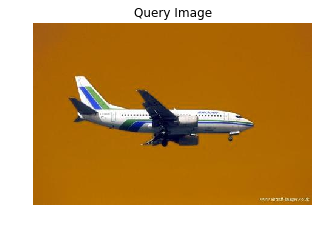

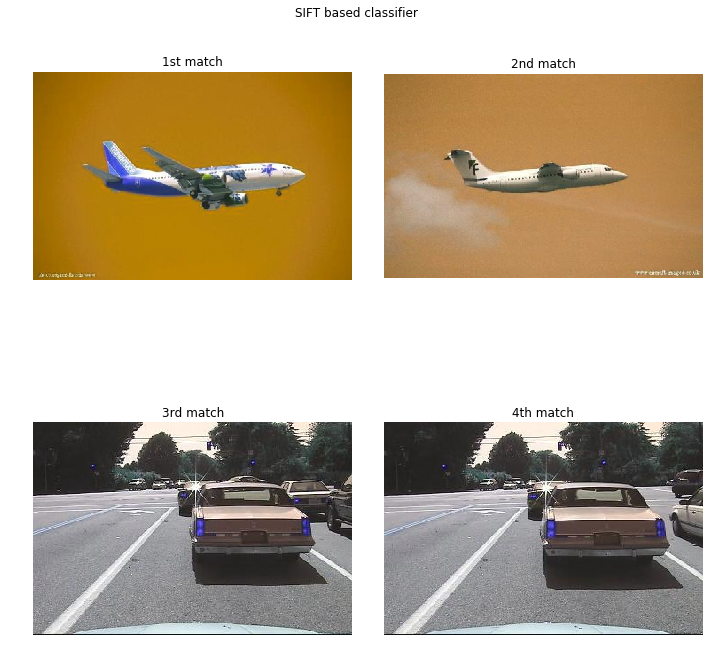

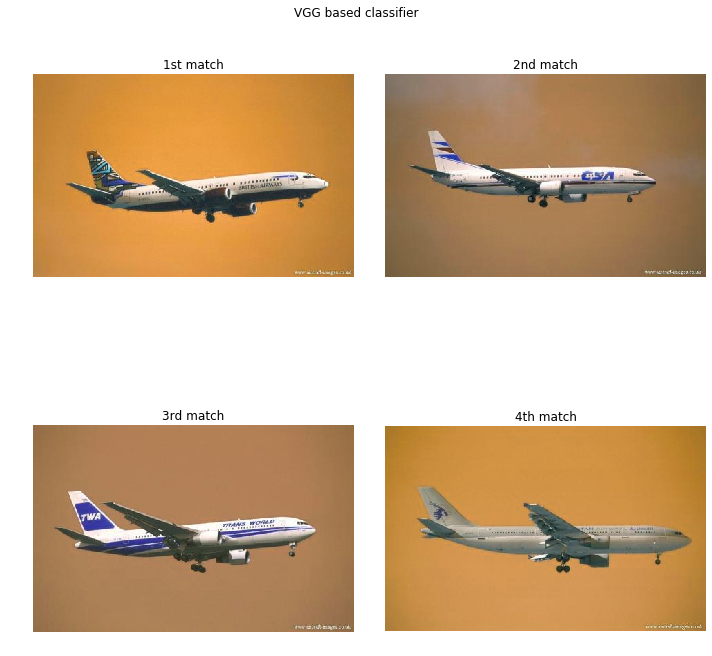

Label predicted by SIFT based classifier = airplanes


In [30]:
SIFTtrain_feature_vectors, train_labels, SIFTtest_feature_vectors, test_labels, centroids, mean_distortion = load_data('Optimal.pkl')
VGGtrain_feature_vectors, train_labels, VGGtest_feature_vectors, test_labels = load_data('VGG16_features.pkl')
train_imgs, train_labels, test_imgs, test_labels = load_data('Datasets.pkl')

query_img = test_imgs[1]
SIFTquery_fv = SIFTtest_feature_vectors[1]
SIFTmatches = retrieve_top_k(SIFTtrain_feature_vectors, SIFTquery_fv, 4)
VGGquery_fv = VGGtest_feature_vectors[1]
VGGmatches = retrieve_top_k(VGGtrain_feature_vectors, VGGquery_fv, 4)

plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap='gray')
plt.axis('off')
plt.title('Query Image')
plot_retrieved_images(train_imgs, SIFTmatches, 'SIFT based classifier')
plot_retrieved_images(train_imgs, VGGmatches, 'VGG based classifier')
print('Label predicted by SIFT based classifier = %s'%(SIFTdataset[12][0][1]))

This image was correctly predicted as belonging to airplanes class by the SIFT based classifier. No surprise for airplanes!

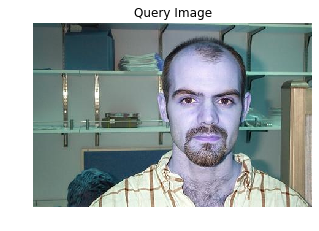

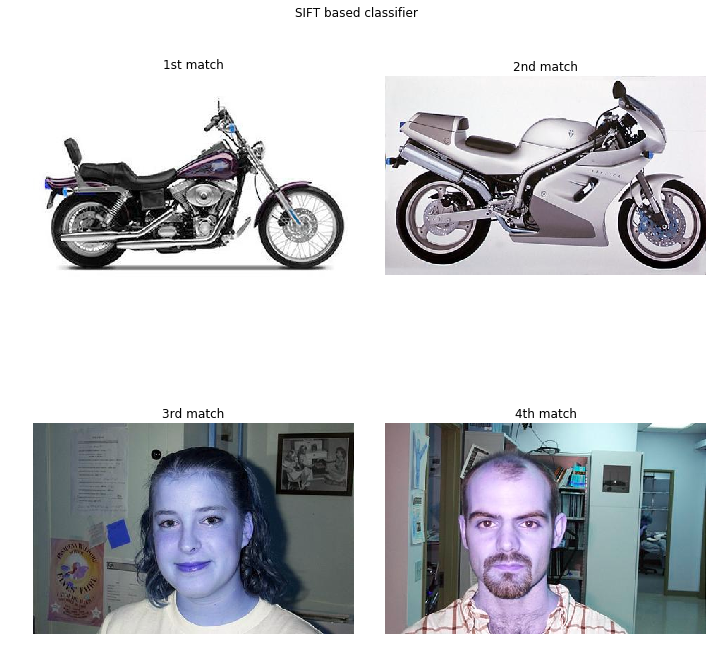

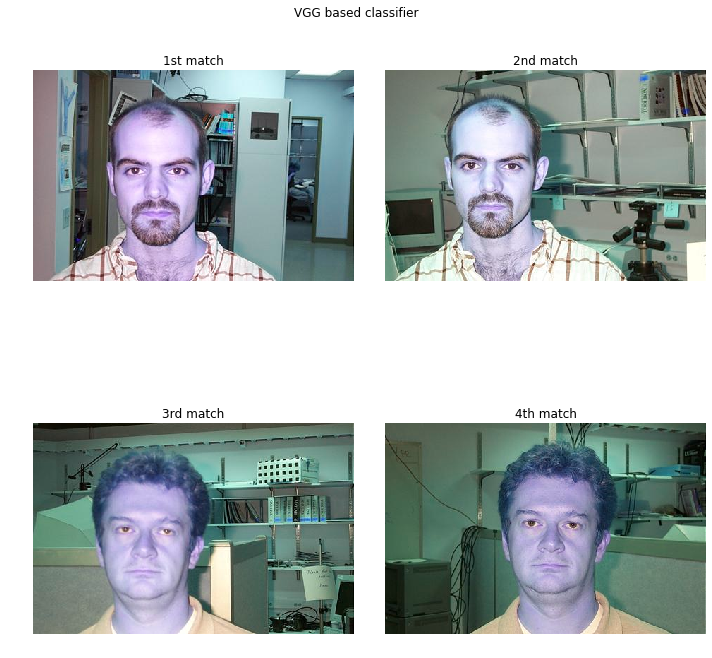

Label predicted by SIFT based classifier = faces


In [31]:
query_img = test_imgs[5]
SIFTquery_fv = SIFTtest_feature_vectors[5]
SIFTmatches = retrieve_top_k(SIFTtrain_feature_vectors, SIFTquery_fv, 4)
VGGquery_fv = VGGtest_feature_vectors[5]
VGGmatches = retrieve_top_k(VGGtrain_feature_vectors, VGGquery_fv, 4)

plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap='gray')
plt.axis('off')
plt.title('Query Image')
plot_retrieved_images(train_imgs, SIFTmatches, 'SIFT based classifier')
plot_retrieved_images(train_imgs, VGGmatches, 'VGG based classifier')
print('Label predicted by SIFT based classifier = %s'%(SIFTdataset[12][0][5]))

This image was correctly predicted as belonging to the faces class by the SIFT based classifier.

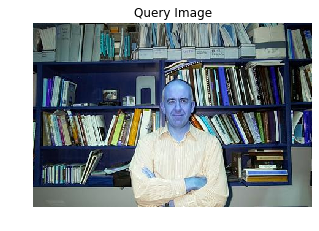

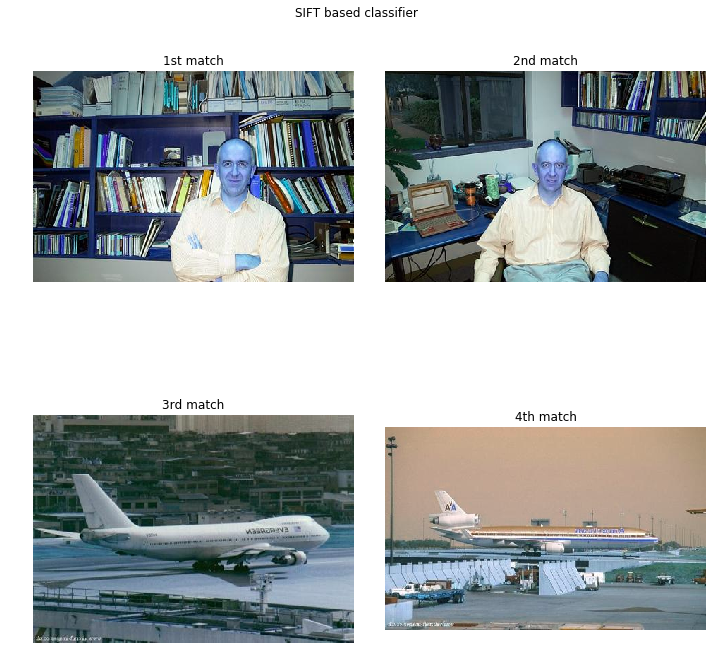

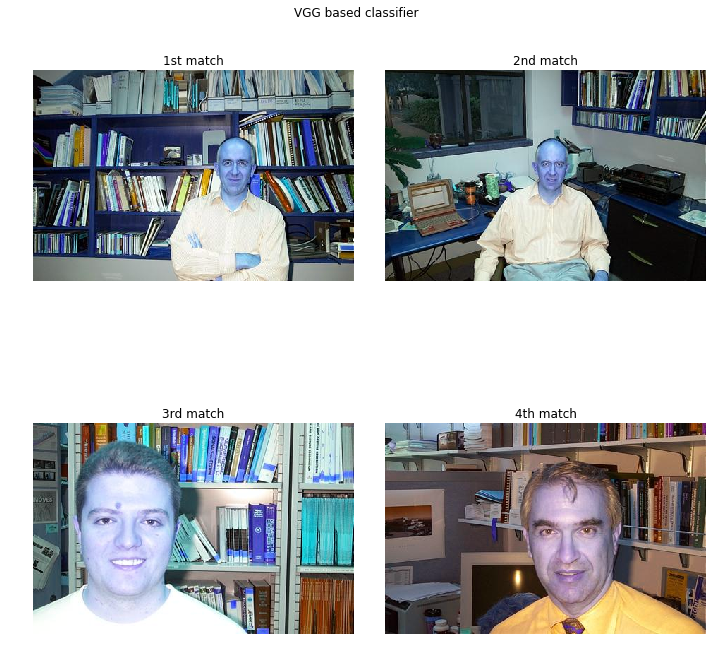

Label predicted by SIFT based classifier = faces


In [32]:
query_img = test_imgs[8]
SIFTquery_fv = SIFTtest_feature_vectors[8]
SIFTmatches = retrieve_top_k(SIFTtrain_feature_vectors, SIFTquery_fv, 4)
VGGquery_fv = VGGtest_feature_vectors[8]
VGGmatches = retrieve_top_k(VGGtrain_feature_vectors, VGGquery_fv, 4)

plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap='gray')
plt.axis('off')
plt.title('Query Image')
plot_retrieved_images(train_imgs, SIFTmatches, 'SIFT based classifier')
plot_retrieved_images(train_imgs, VGGmatches, 'VGG based classifier')
print('Label predicted by SIFT based classifier = %s'%(SIFTdataset[12][0][8]))

This image was correctly predicted as belonging to the faces class by the SIFT based classifier.

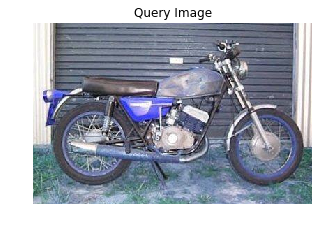

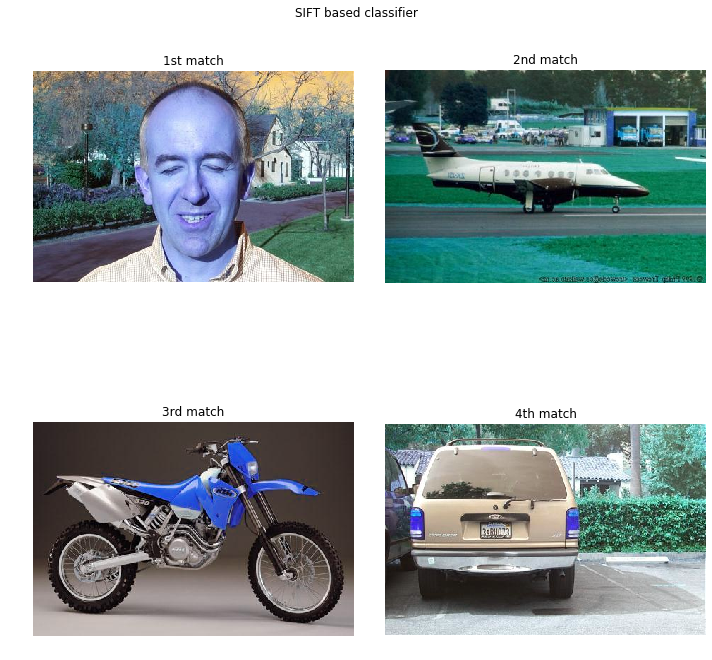

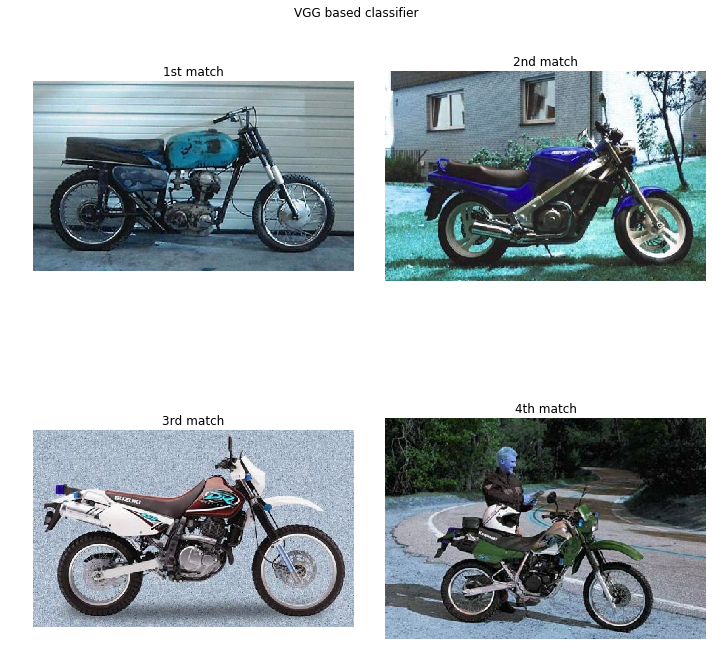

Label predicted by SIFT based classifier = bikes


In [33]:
query_img = test_imgs[10]
SIFTquery_fv = SIFTtest_feature_vectors[10]
SIFTmatches = retrieve_top_k(SIFTtrain_feature_vectors, SIFTquery_fv, 4)
VGGquery_fv = VGGtest_feature_vectors[10]
VGGmatches = retrieve_top_k(VGGtrain_feature_vectors, VGGquery_fv, 4)

plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap='gray')
plt.axis('off')
plt.title('Query Image')
plot_retrieved_images(train_imgs, SIFTmatches, 'SIFT based classifier')
plot_retrieved_images(train_imgs, VGGmatches, 'VGG based classifier')
print('Label predicted by SIFT based classifier = %s'%(SIFTdataset[12][0][10]))

This image was correctly predicted as belonging to the bikes class by the SIFT based classifier. No surprise for bikes!

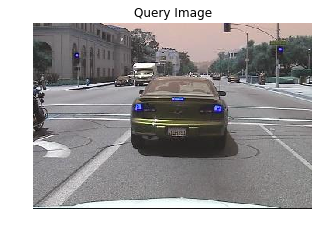

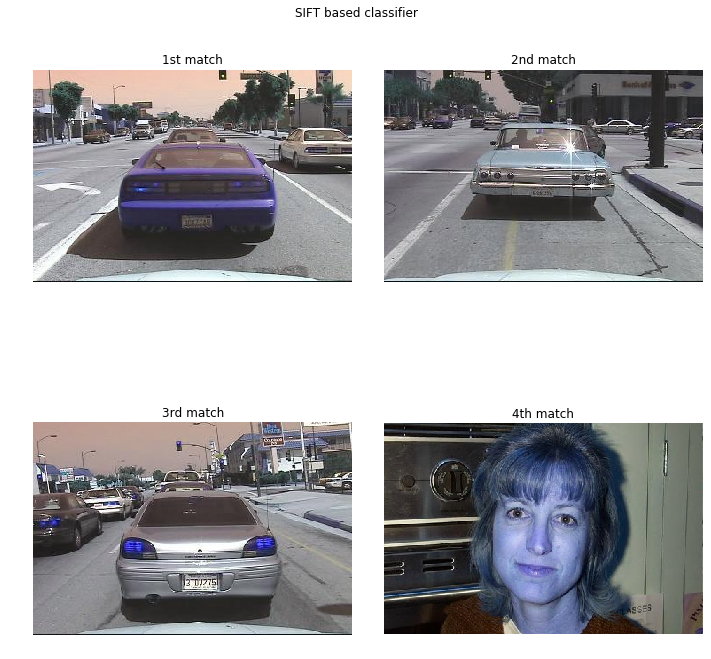

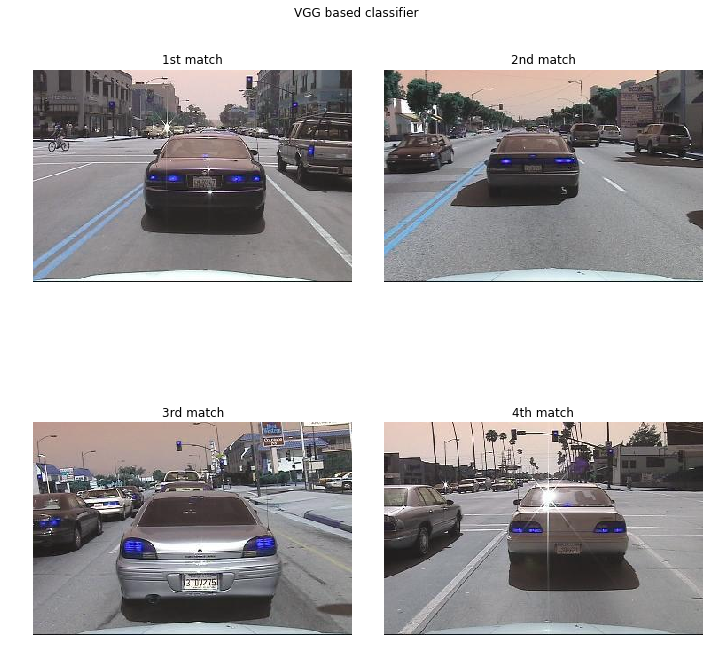

Label predicted by SIFT based classifier = cars


In [34]:
query_img = test_imgs[15]
SIFTquery_fv = SIFTtest_feature_vectors[15]
SIFTmatches = retrieve_top_k(SIFTtrain_feature_vectors, SIFTquery_fv, 4)
VGGquery_fv = VGGtest_feature_vectors[15]
VGGmatches = retrieve_top_k(VGGtrain_feature_vectors, VGGquery_fv, 4)

plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap='gray')
plt.axis('off')
plt.title('Query Image')
plot_retrieved_images(train_imgs, SIFTmatches, 'SIFT based classifier')
plot_retrieved_images(train_imgs, VGGmatches, 'VGG based classifier')
print('Label predicted by SIFT based classifier = %s'%(SIFTdataset[12][0][15]))

This image was correctly predicted as belonging to the cars class by the SIFT based classifier.

From the above images, it can be concluded that the feature vectors computed from visual bag of words using SIFT descriptors are rather mixed up than being well separated (as in the case of VGG16 features). Hence they are inferior to VGG16 features for a classification task.<br>
A seemingly obvious reason for this is that feature vectors computed from visual bag of words model based on SIFT descriptors are in 50 dimensional space which is much smaller than the 4096 dimensional space in which the feature vectors computed from VGG16 network lie.